---------------------------
### Breast cancer diagnosis based on k-nearest neighbors
-----------------------

- Machine learning techniques commonly employed in breast lesion classification
- Improved accuracy in `mammogram-based` malignant mass detection
- `Challenge lies in distinguishing` between `benign` and `malignant` cases
- K-Nearest Neighbors classifier helps address cancer detection issue
- Provides high accuracy in disease classification

In [145]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets  import load_breast_cancer

In [146]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

#### loading data

In [147]:
breast_cancer_data = load_breast_cancer()

X, y          = breast_cancer_data.data, breast_cancer_data.target
feature_names = np.array(breast_cancer_data.feature_names)

In [148]:
print(breast_cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [149]:
features = pd.DataFrame(data    = breast_cancer_data.data, 
                        columns = breast_cancer_data.feature_names)

labels      = pd.DataFrame(data = breast_cancer_data.target)
label_names = breast_cancer_data.target_names

In [150]:
features.shape

(569, 30)

In [151]:
features.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
123,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.70,15.98,102.80,745.5,0.1313,0.1788,0.2560,0.12210,0.2889,0.08006
392,15.49,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,0.1929,0.06744,...,21.20,29.41,142.10,1359.0,0.1681,0.3913,0.5553,0.21210,0.3187,0.10190
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.1722,0.2310,0.11290,0.2778,0.07012
486,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596


In [152]:
labels.value_counts()

1    357
0    212
dtype: int64

#### Missing value

In [153]:
#features.isnull().sum()

No missing values !!!

#### build ML model

- setup a KNN classifer, with default settings

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=.80, random_state=11)

In [156]:
print('Number of training samples : ', len(X_train))
print('Number of test     samples : ', len(X_test))

Number of training samples :  455
Number of test     samples :  114


In [157]:
knn_clf = KNeighborsClassifier()

In [158]:
knn_clf.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [159]:
y_pred = knn_clf.predict(X_test)

#### metrics

In [160]:
print('Accuracy of the model : ', accuracy_score(y_test, y_pred))

Accuracy of the model :  0.9473684210526315


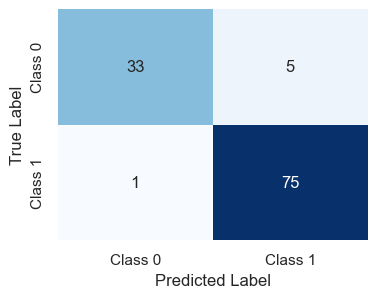

In [161]:
# Assuming you have true labels (y_true) and predicted labels (y_pred)
class_names = ["Class 0", "Class 1"]
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

#### Need for scaling the dataset

In [127]:
features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


data ranges from fractions to 4 leading digits. `Good candidate for scaling`

In [128]:
from sklearn.preprocessing import RobustScaler

In [129]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled  = scaler.fit_transform(X_test.values)

In [130]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train_scaled, y_train.values.ravel())

y_pred = knn_clf.predict(X_test_scaled)

In [131]:
print('Accuracy of the model : ', accuracy_score(y_test, y_pred))

Accuracy of the model :  0.9824561403508771


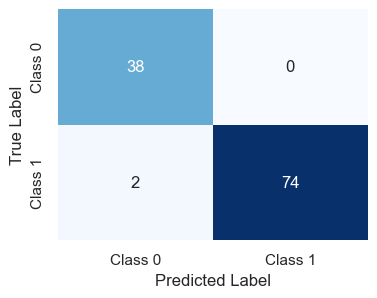

In [132]:
# Assuming you have true labels (y_true) and predicted labels (y_pred)
class_names = ["Class 0", "Class 1"]
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.97      0.99        76

    accuracy                           0.98       114
   macro avg       0.97      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



#### find optimal value of K

In [134]:
# Choose a range of 'k' values
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

best_accuracy = 0
best_k        = None

# Loop over 'k' values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.values.ravel())
    
    y_pred   = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best 'k' value:", best_k)

Best 'k' value: 7


In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
# Perform 5-fold cross-validation
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

In [137]:
# Choose a range of 'k' values
k_values = [1, 3, 5, 7, 9, 11]

best_accuracy = 0
best_k        = None

# Loop over 'k' values
for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(knn, X_train_scaled, y_train.values.ravel(), cv=5, scoring='accuracy')

    # Calculate the average accuracy across folds
    average_accuracy = scores.mean()
    
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_k = k

print("Best 'k' value:", best_k)
print("Average accuracy:", best_accuracy)


Best 'k' value: 5
Average accuracy: 0.9692307692307693


#### Final model build

In [138]:
knn_clf = KNeighborsClassifier(n_neighbors=7)

knn_clf.fit(X_train_scaled, y_train.values.ravel())

y_pred = knn_clf.predict(X_test_scaled)

In [139]:
print('Accuracy of the model : ', accuracy_score(y_test, y_pred))

Accuracy of the model :  0.9912280701754386


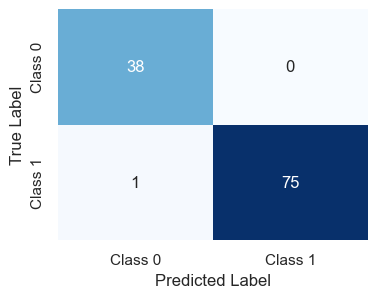

In [140]:
# Assuming you have true labels (y_true) and predicted labels (y_pred)
class_names = ["Class 0", "Class 1"]
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Saving/load the model

In [141]:
import pickle

In [142]:
# Save the trained model using pickle
model_filename = "knn_model_breast_cancer.pkl"

with open(model_filename, 'wb') as model_file:
    pickle.dump(knn_clf, model_file)

loading the model

In [143]:
# Load the saved model using pickle
with open(model_filename, 'rb') as model_file:
    loaded_knn = pickle.load(model_file)

In [144]:
# Make predictions using the loaded model
y_pred = loaded_knn.predict(X_test_scaled)

# Calculate accuracy using the loaded model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using loaded model:", accuracy)

Accuracy using loaded model: 0.9912280701754386
